In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the data
## CHANGE THIS TO YOUR OWN PATH

PATH = 'C:/Users/Sandil/OneDrive/Documents/University/Liverpool/(3) Machine learning in practice/W8 Group/Shared Folder/Data/Cleaned/Emissions_cleaned_all.xlsx'

df = pd.read_excel(PATH, sheet_name='in', index_col=0)

df.head()

,GRID_ExactCut_ID,Location_ExactCut,BoroughName_ExactCut,VKM_Motorcycle,Motorcycle_CO2,Motorcycle_Nox,Motorcycle_Exhaust_PM_2_5,Motorcycle_Brake_PM_2_5,Motorcycle_Tyre_PM_2_5,Motorcycle_Exhaust_PM_10,...,Artic HGV_Exhaust_PM_10,Artic HGV_Brake_PM_10,Artic HGV_Tyre_PM_10,Artic_HGV_Total Emissions,Total_VKM,Total_CO2,Total_Nox,Total_PM_2_5,Total_PM_10,Total_All
Index,,,,,,,,,,,,,,,,,,,,,
0,1,External,NonGLA,7223.168225,0.774054,0.000844,0.000090,0.000064,0.000021,0.000095,...,0.000055,0.000166,0.000044,1.039206,5.725823e+05,111.804879,0.367212,0.027588,0.047287,112.246966
1,2,External,NonGLA,324186.370235,39.496883,0.103814,0.003656,0.000572,0.000639,0.003849,...,0.110641,0.075501,0.088245,2450.708765,6.794116e+07,14093.095371,41.050349,1.658105,2.278815,14138.082640
2,3,External,NonGLA,93984.001794,12.542140,0.030352,0.000989,0.000279,0.000203,0.001041,...,0.077838,0.047535,0.060570,1702.193213,3.279415e+07,7380.184958,21.907652,0.886840,1.239059,7404.218509
3,4,External,NonGLA,7204.224780,0.772024,0.000841,0.000090,0.000064,0.000021,0.000095,...,0.000055,0.000165,0.000043,1.031982,5.706961e+05,111.433542,0.383323,0.029253,0.048984,111.895102
4,5,External,NonGLA,6499.471249,0.696501,0.000759,0.000081,0.000058,0.000019,0.000086,...,0.000050,0.000149,0.000039,0.933371,5.152737e+05,100.610688,0.340021,0.025854,0.043627,101.020190


In [3]:
df.columns.tolist()[3:43]

['VKM_Motorcycle',
 'Motorcycle_CO2',
 'Motorcycle_Nox',
 'Motorcycle_Exhaust_PM_2_5',
 'Motorcycle_Brake_PM_2_5',
 'Motorcycle_Tyre_PM_2_5',
 'Motorcycle_Exhaust_PM_10',
 'Motorcycle_Brake_PM_10',
 'Motorcycle_Tyre_PM_10',
 'MotorCycle_Total Emissions',
 'VKM_Taxi',
 'Taxi_CO2',
 'Taxi_Nox',
 'Taxi_Exhaust_PM_2_5',
 'Taxi_Brake_PM_2_5',
 'Taxi_Tyre_PM_2_5',
 'Taxi_Exhaust_PM_10',
 'Taxi_Brake_PM_10',
 'Taxi_Tyre_PM_10',
 'Taxi_Total Emissions',
 'VKM_PetrolCar',
 'Petrol_Car_CO2',
 'Petrol_Car_Nox',
 'Petrol Car_Exhaust_PM_2_5',
 'Petrol Car_Brake_PM_2_5',
 'Petrol Car_Tyre_PM_2_5',
 'Petrol Car_Exhaust_PM_10',
 'Petrol Car_Brake_PM_10',
 'Petrol Car_Tyre_PM_10',
 'Petrol_Car_Total Emissions',
 'VKM_DieselCar',
 'Diesel_Car_CO2',
 'Diesel_Car_Nox',
 'Diesel Car_Exhaust_PM_2_5',
 'Diesel Car_Brake_PM_2_5',
 'Diesel Car_Tyre_PM_2_5',
 'Diesel Car_Exhaust_PM_10',
 'Diesel Car_Brake_PM_10',
 'Diesel Car_Tyre_PM_10',
 'Diesel_Car_Total Emissions']

In [4]:
agg = df[['VKM_PetrolCar', 'VKM_DieselCar', 'VKM_Taxi', 'VKM_Motorcycle', 'Total_VKM']].agg('sum')
agg[0:4].sum()/agg[4]

0.8391975642468968

In [5]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(df[df.columns[3:43]], df['Total_CO2'], test_size=0.2, random_state=42)

In [7]:
# Decision Tree Regressor

tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [8]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
forest.fit(X_train, y_train)
y_pred_rf = forest.predict(X_test)


In [9]:
# Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gb = gbr.predict(X_test)

In [10]:
# SVR 

from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler

svr = LinearSVR(C=1, epsilon=.05, random_state=42)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

C:\Users\Sandil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
print('Decision Tree Regressor')
print('<-------------------------------->')
print('R2 score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('<-------------------------------->')
print('Random Forest Regressor:')
print('<-------------------------------->')
print('R2 score: ', r2_score(y_test, y_pred_rf))
print('MSE: ', mean_squared_error(y_test, y_pred_rf))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print('<-------------------------------->')
print('Gradient Boosting Regressor:')
print('<-------------------------------->')
print('R2 score: ', r2_score(y_test, y_pred_gb))
print('MSE: ', mean_squared_error(y_test, y_pred_gb))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print('<-------------------------------->')
print('SVR:')
print('<-------------------------------->')
print('R2 score: ', r2_score(y_test, y_pred_svr))
print('MSE: ', mean_squared_error(y_test, y_pred_svr))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_svr)))

Decision Tree Regressor
<-------------------------------->
R2 score:  0.9493728778801303
MSE:  582506.87280657
RMSE:  763.2213786356945
<-------------------------------->
Random Forest Regressor:
<-------------------------------->
R2 score:  0.9762501356381903
MSE:  273261.813820311
RMSE:  522.7445014730532
<-------------------------------->
Gradient Boosting Regressor:
<-------------------------------->
R2 score:  0.9833564272795856
MSE:  191498.0566097062
RMSE:  437.60490926143206
<-------------------------------->
SVR:
<-------------------------------->
R2 score:  0.9341476833923702
MSE:  757685.3158541193
RMSE:  870.4512139425847


<Figure size 1500x500 with 0 Axes>

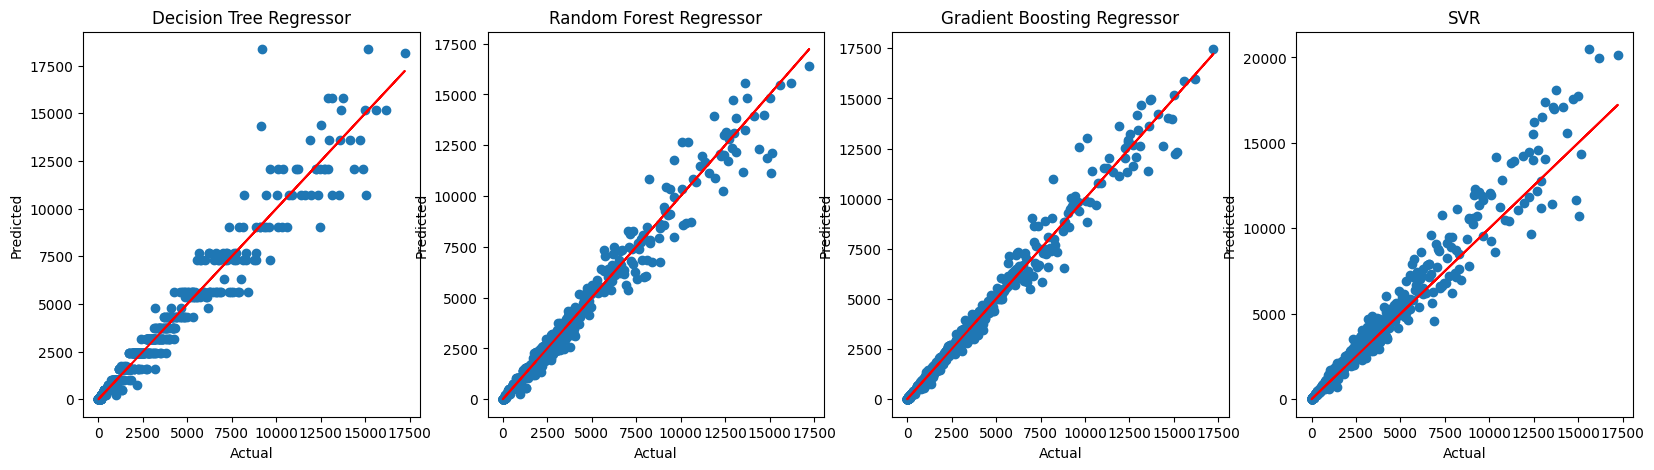

In [12]:
# Create 3 subplots for the 3 models
plt.figure(figsize=(15, 5))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
ax1.scatter(y_test, y_pred, cmap=plt.get_cmap('viridis'))
ax1.plot(y_test, y_test, color='red')
ax1.set_title('Decision Tree Regressor')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax2.scatter(y_test, y_pred_rf)
ax2.plot(y_test, y_test, color='red')
ax2.set_title('Random Forest Regressor')
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax3.scatter(y_test, y_pred_gb)
ax3.plot(y_test, y_test, color='red')
ax3.set_title('Gradient Boosting Regressor')
ax3.set_xlabel('Actual')
ax3.set_ylabel('Predicted')
ax4.scatter(y_test, y_pred_svr)
ax4.plot(y_test, y_test, color='red')
ax4.set_title('SVR')
ax4.set_xlabel('Actual')
ax4.set_ylabel('Predicted')

plt.show()